# Predicting Anxiety Severity from Social Media Use: Differential Evolution as an Optimizer
## Micah Tracy
## 4/22/2025

In [80]:
# Imports 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.optimize import minimize, differential_evolution, shgo, dual_annealing

## Data Preparation

In [2]:
# Read in data 
full_data = pd.read_csv("mmc2.csv")
print(full_data.columns)
full_data.head()

Index(['Timestamp',
       '1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)',
       '2. Which social media account do you use usually?',
       '3. Which device do you usually use to connect social media?',
       '4. Which type of internet connection do you use?',
       '5. How long have you been using a social media account?',
       '6. How frequently do you post (upload status or add photos/videos) on social media? ',
       '7. How much time do you spend daily in social media?',
       '8. When do you usually use social media?',
       '9. How many friends do you have on social media?',
       '10. How many friends do you know personally in social media? ',
       '11. How many groups you are tagged in social media?',
       '12. What is your main purpose for using social media (e.g. Facebook)?',
       '13. What contents do you mainly look for in your social media news feed?',
       '14.Do you believe social media is a good thing?',
       '15. When you 

,Timestamp,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,...,"10. In last 30 days, How many times, I cough or snore loudly?","11. In last 30 days, How many times, I feel too cold?","12. In last 30 days, How many times, I feel too hot?","13. In last 30 days, How many times, I saw bad dreams?","14. In last 30 days, How many times, I have pain during sleep?","15. In last 30 days, How many times, I having trouble sleeping for any other reason?","16. In last 30 days, In last month, have you take medicines for sleep?","17. In last month, how many times you cannot sleep due to any program or other important case?","18. In last month, how many times you face problems to maintain program or other important case?","19. During the past month, how would you rate your sleep quality overall?"
0,2/20/2021 21:56:50,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,...,Not during last month,Less then once a week,Not during last month,Not during last month,Not during last month,Less then once a week,Not during last month,Less then once a week,Less then once a week,Farely good
1,2/20/2021 23:32:52,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,...,Less then once a week,Less then once a week,Three or more in week,Less then once a week,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Very bad
2,2/16/2021 21:03:59,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,...,Not during last month,Not during last month,Less then once a week,Less then once a week,Three or more in week,Three or more in week,Not during last month,Three or more in week,Once or twice a week,Very bad
3,3/1/2021 10:03:23,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,...,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Farely good
4,2/27/2021 19:27:54,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,...,Not during last month,Not during last month,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Farely good


In [3]:
# Get the column indices for the features we want
social_media_col_names = ['1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)',
       '2. Which social media account do you use usually?',
       '3. Which device do you usually use to connect social media?',
       '4. Which type of internet connection do you use?',
       '5. How long have you been using a social media account?',
       '6. How frequently do you post (upload status or add photos/videos) on social media? ',
       '7. How much time do you spend daily in social media?',
       '8. When do you usually use social media?',
       '9. How many friends do you have on social media?',
       '10. How many friends do you know personally in social media? ',
       '11. How many groups you are tagged in social media?',
       '12. What is your main purpose for using social media (e.g. Facebook)?',
       '13. What contents do you mainly look for in your social media news feed?',
       '14.Do you believe social media is a good thing?',
       '15. When you see something in social media, do you instantly believe it?',
       '16. Have you ever experienced peer pressure due to social media?',
       "17. Does your emotion get influenced by other's posts (success, failure, loss)? ",
       "18. Have you ever compared yourself with other’s success or luxurious life?",
       '19. Do you think, your mental wellbeing would be better if you do not use social media?',
       '20. If answer is yes, are you trying to control that thing and trying to reduce the use of social media?']

# Get column indices for GAD questionnaire questions
gad_col_names = ['1. In the last 30 days, I am feeling nervous, anxious, or on edge',
       '2. In the last 30 days, I an not being able to stop or control worrying',
       '3. In the last 30 days, I am worrying too much about different things.',
       '4. In the last 30 days, I felt trouble in relaxing.',
       "5. In the last 30 days, I am being so restless that it's hard to sit still",
       '6. In the last 30 days, I becoming easily annoyed or irritable.',
       '7. In the last 30 days, I am feeling afraid as if something awful might happen.']

social_media_col_indices = [full_data.columns.get_loc(c) for c in social_media_col_names if c in full_data]
gad_col_indices = [full_data.columns.get_loc(c) for c in gad_col_names if c in full_data]
print(social_media_col_indices)
print(gad_col_indices)
all_desired_indices = social_media_col_indices + gad_col_indices

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[50, 51, 52, 53, 54, 55, 56]


In [4]:
# Cut down our data 
sm_gad = full_data.iloc[:, all_desired_indices]
sm_gad.head()

,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,10. How many friends do you know personally in social media?,...,18. Have you ever compared yourself with other’s success or luxurious life?,"19. Do you think, your mental wellbeing would be better if you do not use social media?","20. If answer is yes, are you trying to control that thing and trying to reduce the use of social media?","1. In the last 30 days, I am feeling nervous, anxious, or on edge","2. In the last 30 days, I an not being able to stop or control worrying","3. In the last 30 days, I am worrying too much about different things.","4. In the last 30 days, I felt trouble in relaxing.","5. In the last 30 days, I am being so restless that it's hard to sit still","6. In the last 30 days, I becoming easily annoyed or irritable.","7. In the last 30 days, I am feeling afraid as if something awful might happen."
0,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,All of them,...,Never,No,Not trying,Not at all,Several days,Several days,Several days,Several days,Several days,Several days
1,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,All of them,...,Never,Yes,Trying to reduce the use,Several days,Half days,Nearly everyday,Several days,Several days,Nearly everyday,Not at all
2,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,Many of them,...,Never,Yes,Trying to reduce the use,Nearly everyday,Nearly everyday,Nearly everyday,Nearly everyday,Nearly everyday,Several days,Nearly everyday
3,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,Few of them,...,All the times,Yes,Trying to reduce the use,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
4,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,Most of them,...,Never,Yes,Not trying,Half days,Half days,Half days,Nearly everyday,Half days,Half days,Half days


In [5]:
sm_gad.iloc[:,20].unique()

array(['Not at all', 'Several days', 'Nearly everyday', 'Half days'],
      dtype=object)

In [6]:
# Define scores for each response to the GAD-7 assessment
# https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf 
gad_scores = {'Not at all': 0, 'Several days': 1, 'Half days': 2, 'Nearly everyday': 3}
gad_scores

{'Not at all': 0, 'Several days': 1, 'Half days': 2, 'Nearly everyday': 3}

In [7]:
# Convert the string responses to the GAD questions to the numerical scores based on the survey's scoring system
sm_gad[gad_col_names] = sm_gad[gad_col_names].replace(gad_scores)
sm_gad.iloc[:,-7:]

/tmp/ipykernel_242027/1467742604.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sm_gad[gad_col_names] = sm_gad[gad_col_names].replace(gad_scores)
/tmp/ipykernel_242027/1467742604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_gad[gad_col_names] = sm_gad[gad_col_names].replace(gad_scores)


,"1. In the last 30 days, I am feeling nervous, anxious, or on edge","2. In the last 30 days, I an not being able to stop or control worrying","3. In the last 30 days, I am worrying too much about different things.","4. In the last 30 days, I felt trouble in relaxing.","5. In the last 30 days, I am being so restless that it's hard to sit still","6. In the last 30 days, I becoming easily annoyed or irritable.","7. In the last 30 days, I am feeling afraid as if something awful might happen."
0,0,1,1,1,1,1,1
1,1,2,3,1,1,3,0
2,3,3,3,3,3,1,3
3,0,0,0,0,0,0,0
4,2,2,2,3,2,2,2
...,...,...,...,...,...,...,...
786,0,0,0,1,0,1,0
787,3,3,3,3,1,3,3
788,3,2,3,1,0,1,1
789,1,0,3,1,1,1,3


In [8]:
# Create score column based on sum of their scores from the GAD survey questions
sm_gad['gad_score'] = sm_gad[gad_col_names].sum(axis=1)
# Drop the answers to the survey questions
sm_gad = sm_gad.drop(sm_gad.columns[-8:-1], axis=1)
sm_gad

/tmp/ipykernel_242027/450181657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_gad['gad_score'] = sm_gad[gad_col_names].sum(axis=1)


,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,10. How many friends do you know personally in social media?,...,12. What is your main purpose for using social media (e.g. Facebook)?,13. What contents do you mainly look for in your social media news feed?,14.Do you believe social media is a good thing?,"15. When you see something in social media, do you instantly believe it?",16. Have you ever experienced peer pressure due to social media?,"17. Does your emotion get influenced by other's posts (success, failure, loss)?",18. Have you ever compared yourself with other’s success or luxurious life?,"19. Do you think, your mental wellbeing would be better if you do not use social media?","20. If answer is yes, are you trying to control that thing and trying to reduce the use of social media?",gad_score
0,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,All of them,...,To stay connected with people,Updates of people,Yes,No,No,Sometimes,Never,No,Not trying,6
1,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,All of them,...,To stay connected with people,To stay connected with people,Yes,No,No,Sometimes,Never,Yes,Trying to reduce the use,11
2,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,Many of them,...,To stay connected with people,Motivational/ informative contents,Yes,No,Yes,Not at all,Never,Yes,Trying to reduce the use,19
3,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,Few of them,...,For time pass,Updates of current affairs/news,Yes,Yes,Yes,Always,All the times,Yes,Trying to reduce the use,0
4,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,Most of them,...,For time pass,Get pleasure from funny posts/ memes,Yes,Yes,Yes,Sometimes,Never,Yes,Not trying,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),More than 10 years,Less than 1 per day,1-3 hours,Night to late night,Less than 500,All of them,...,To stay connected with people,Get pleasure from funny posts/ memes,Yes,No,Yes,Sometimes,Never,No,Trying to reduce the use,2
787,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,Less than 1 hour,Frequently at anytime,Less than 500,Many of them,...,To stay connected with people,Updates of people,No,No,No,Sometimes,Most of the times,Yes,Trying to stop the use,19
788,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,More than 5 per day,3-5 hours,Frequently at anytime,500-2000,All of them,...,To stay connected with people,To stay connected with people,Yes,No,No,Not at all,Never,No,Not trying,11
789,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),2-5 years,Less than 1 per day,1-3 hours,Evening,Less than 500,Most of them,...,To stay connected with people,Updates of people,Yes,No,Yes,Sometimes,Never,No,Not trying,10


In [9]:
# Look at unique values in each column 
for col in social_media_col_names:
    print(col, sm_gad[col].unique())

# First column only has yes's, we can drop it 
sm_gad = sm_gad.drop(social_media_col_names[0], axis=1)

1. Do you have a social media account? (e.g., Facebook, Twitter, etc.) ['Yes']
2. Which social media account do you use usually? ['Facebook' 'Twitter' 'Snapchat' 'Instagram' 'WhatsApp' 'imo' 'Imo'
 'WeChat' 'Tiktok ']
3. Which device do you usually use to connect social media? ['Mobile Phone' 'Tablet' 'Laptop' 'Desktop']
4. Which type of internet connection do you use? ['Broadband (Wi-Fi)' 'Mobile data']
5. How long have you been using a social media account? ['5-10 years' 'Less than 2-year' '2-5 years' 'More than 10 years']
6. How frequently do you post (upload status or add photos/videos) on social media?  ['Less than 1 per day' '3-5 per day' 'More than 5 per day' '1-2 per day']
7. How much time do you spend daily in social media? ['1-3 hours' 'More than 5 hours' '3-5 hours' 'Less than 1 hour']
8. When do you usually use social media? ['Frequently at anytime' 'Night to late night' 'Evening' 'Afternoon'
 'Morning']
9. How many friends do you have on social media? ['Less than 500' '500

### Feature Columns

Ordinal columns:
Questions 5, 6, 7, 9, 10, 11, 17, 18

Yes/No columns:
Questions 14-16, 19

Columns I need to get dummies for:
Questions 2, 3, 4, 8, 12, 13, 20  
(Column 13 has so many different responses it may not be helpful to get dummies for it)

In [10]:
# Create dictionaries to convert ordinal variables from certain columns into numbers 
q5_dict = {'Less than 2-year': 0, '2-5 years': 1, '5-10 years': 2, 'More than 10 years': 3}
q6_dict = {'Less than 1 per day': 0, '1-2 per day': 1, '3-5 per day': 2, 'More than 5 per day': 3}
q7_dict = {'Less than 1 hour': 0, '1-3 hours': 1, '3-5 hours': 2, 'More than 5 hours': 3}
q9_dict = {'Less than 500': 0, '500-2000': 1, '2000-4000': 2, 'More than 4000': 3}
q10_dict = {'Few of them': 0, 'Many of them': 1, 'Most of them': 2, 'All of them': 3}
q11_dict = {'Less than 5': 0, '5-10': 1, '10-20': 2, 'More than 20': 3}
q17_dict = {'Not at all': 0, 'Sometimes': 1, 'Always': 2}
q18_dict = {'Never': 0, 'Most of the times': 1, 'All the times': 2}
yes_no_dict = {'No': 0, 'Yes': 1}

In [11]:
# Use dictionaries to convert columns 
sm_gad[social_media_col_names[4]] = sm_gad[social_media_col_names[4]].replace(q5_dict)
sm_gad[social_media_col_names[5]] = sm_gad[social_media_col_names[5]].replace(q6_dict)
sm_gad[social_media_col_names[6]] = sm_gad[social_media_col_names[6]].replace(q7_dict)
sm_gad[social_media_col_names[8]] = sm_gad[social_media_col_names[8]].replace(q9_dict)
sm_gad[social_media_col_names[9]] = sm_gad[social_media_col_names[9]].replace(q10_dict)
sm_gad[social_media_col_names[10]] = sm_gad[social_media_col_names[10]].replace(q11_dict)
sm_gad[social_media_col_names[16]] = sm_gad[social_media_col_names[16]].replace(q17_dict)
sm_gad[social_media_col_names[17]] = sm_gad[social_media_col_names[17]].replace(q18_dict)
sm_gad[social_media_col_names[13:16]] = sm_gad[social_media_col_names[13:16]].replace(yes_no_dict)
sm_gad[social_media_col_names[18]] = sm_gad[social_media_col_names[18]].replace(yes_no_dict)

# The second question has some different capitalizations of the same social media platform, so we will fix that here:
sm_gad[social_media_col_names[1]] = sm_gad[social_media_col_names[1]].replace({'imo': 'Imo'})

/tmp/ipykernel_242027/2533011351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sm_gad[social_media_col_names[4]] = sm_gad[social_media_col_names[4]].replace(q5_dict)
/tmp/ipykernel_242027/2533011351.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sm_gad[social_media_col_names[5]] = sm_gad[social_media_col_names[5]].replace(q6_dict)
/tmp/ipykernel_242027/2533011351.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [12]:
# Get dummies for categorical columns: get k-1 dummies by setting drop_first to be true. 
# Not including question 13 bc there are too many categories
# dropped the GAD score variable to just get the features
features = pd.get_dummies(sm_gad.drop([social_media_col_names[12], 'gad_score'], axis=1), drop_first=True)
gad_score = sm_gad['gad_score']
print(features.shape)
print(gad_score.shape)

(791, 36)
(791,)


In [13]:
# A score of 10 or above is indicative of moderate to severe anxiety: so we will create a binary variable based on whether or not the 
# individual's GAD score is above 10 
gad_high = pd.Series(np.where(gad_score > 9, 1, 0))
sum(gad_high)

249

## Differential Evolution (and other optimizers) implementation using Scipy

In [14]:
# Functions 
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression objective function (negative log-likelihood)
def logistic_loss(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    loss = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return loss

# Gradient of the logistic loss function
def logistic_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = 1/m * X.T.dot(h - y)
    return gradient

def _sigmoid_function(x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

def _sigmoid(x):
    return np.array([_sigmoid_function(value) for value in x])

def predict(x, weights):
    x_dot_weights = np.matmul(x, weights.transpose())
    probabilities = _sigmoid(x_dot_weights)
    return [1 if p > 0.5 else 0 for p in probabilities]

In [15]:
# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features.values, gad_high.values, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(632, 36) (159, 36)


In [16]:
# Scale X based on training data 
scaler = StandardScaler()
scaler.fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

# Add bias term to the features
X_trains = np.concatenate((np.ones((X_trains.shape[0], 1)), X_trains), axis=1)
X_tests = np.concatenate((np.ones((X_tests.shape[0], 1)), X_tests), axis=1)

In [17]:
# Bounds for our function 
bounds = [(-2.0, 2.0),]*37

In [18]:
# Initial parameter values
initial_theta = np.zeros(X_trains.shape[1])

# Use the minimize function with the BFGS method
start_time = time.perf_counter()
result = minimize(logistic_loss, initial_theta, args=((X_trains, y_train)), method='BFGS', jac=logistic_gradient)
end_time = time.perf_counter()

minimize_time = end_time-start_time

# Optimal parameters
optimal_theta_minimize = result.x

print("Optimal parameters:", optimal_theta_minimize)
print("Time taken:", minimize_time)

Optimal parameters: [-1.03331556  0.05074067  0.07097498  0.13606351 -0.20404104 -0.18697288
 -0.06124706 -0.15065179 -0.52910261  0.09147502  0.24852357  0.35739809
  0.21802283  0.17533267  0.03349488 -0.0021026  -0.47613085 -0.00997475
 -0.5098923  -0.07877218 -0.18453675 -0.36275026 -0.33618876 -0.13064131
 -0.0641979   0.21921703  0.01989023  0.32965221 -0.04992967 -0.50925198
 -0.15547635  0.13108064  0.10251575 -0.10156035  0.04995618  0.06602746
  0.        ]
Time taken: 0.20715169899631292


In [19]:
# Use dual annealing optimizer
start_time = time.perf_counter()
ret = dual_annealing(logistic_loss, bounds=bounds, args=(X_trains, y_train))
end_time = time.perf_counter()

dual_time = end_time-start_time

# Optimal parameters
optimal_theta_dual = ret.x

print("Optimal parameters:", optimal_theta_dual)
print("Time taken:", dual_time)

/tmp/ipykernel_242027/1627461624.py:10: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
/home/mdtracy/anaconda3/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimal parameters: [-1.12117809  0.05077741  0.07101333  0.13607624 -0.20404921 -0.18697611
 -0.06127881 -0.15069242 -0.52908995  0.09152809  0.24854309  0.35739239
  0.21798682  0.17533749  0.0335364  -0.00208794 -1.29677814 -0.01000949
 -1.96554469 -0.07888242 -0.18447535 -0.36261092 -0.33603285 -0.1306669
 -0.06436935  0.21899752  0.019753    0.32948969 -0.04987451 -0.30098756
 -0.15546199  0.13114449  1.79929757  1.63304665  1.18586603  0.30473719
  0.889547  ]
Time taken: 39.71637839199684


In [21]:
# Use the differential evolution function
start_time = time.perf_counter()
result = differential_evolution(logistic_loss, bounds=bounds, args=(X_trains, y_train), recombination=0.5, popsize=15)
end_time = time.perf_counter()

diff_time = end_time-start_time

# Optimal parameters
optimal_theta_diff = result.x

print("Optimal parameters:", optimal_theta_diff)
print("Time taken:", diff_time)

/tmp/ipykernel_242027/1627461624.py:10: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))


Optimal parameters: [ 0.4867534  -1.61155444  1.74335219 -1.84279803  1.68755144 -0.13272821
  1.60032248 -0.92246076 -1.13876254 -0.51633375 -1.87191061 -0.34186636
 -1.76704851  0.22715749 -0.99020036  1.80362676  0.20664972  1.91235891
 -1.46462244 -1.50819588  1.72116238  1.17385908 -1.19497784 -0.94469883
 -0.75031681 -0.46416036  0.597089    1.89174402  1.58054357 -0.54122178
 -0.81867242 -0.41569978 -0.38900671  0.23964972 -1.27400838 -1.86205381
  0.5795107 ]
Time taken: 808.045456641994


In [82]:
# Write all optimized parameters to csv's in case a later iteration would come up with different random values
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
np.savetxt(f'minimize_opt_{timestamp}.csv', optimal_theta_minimize, delimiter=',')
np.savetxt(f'dual_opt_{timestamp}.csv', optimal_theta_dual, delimiter=',')
np.savetxt(f'diff_opt_{timestamp}.csv', optimal_theta_diff, delimiter=',')

## Assess Performance for our Different Optimizers

In [85]:
# Read in parameters
optimal_theta_minimize = np.loadtxt("minimize_opt_20250422_205645.csv", delimiter=",")
optimal_theta_dual = np.loadtxt("dual_opt_20250422_205645.csv", delimiter=",")
optimal_theta_diff = np.loadtxt("diff_opt_20250422_205645.csv", delimiter=",")

In [20]:
def get_scores(actual, pred):
    acc = accuracy_score(actual, pred)
    precision = precision_score(actual, pred)
    recall = recall_score(actual, pred)
    return (acc, precision, recall)

In [84]:
# Make predictions using weights from minimization method
pred_minimize_train = predict(X_trains, optimal_theta_minimize)
accuracy_minimize_train, precision_minimize_train, recall_minimize_train = get_scores(y_train, pred_minimize_train)
print("Training set accuracy:", accuracy_minimize_train)
print("Training set precision:", precision_minimize_train)
print("Training set recall:", recall_minimize_train)

pred_minimize_test = predict(X_tests, optimal_theta_minimize)
accuracy_minimize_test, precision_minimize_test, recall_minimize_test = get_scores(y_test, pred_minimize_test)
print("Testing set accuracy:", accuracy_minimize_test)
print("Testing set precision:", precision_minimize_test)
print("Testing set recall:", recall_minimize_test)

Training set accuracy: 0.7389240506329114
Training set precision: 0.6741573033707865
Training set recall: 0.30612244897959184
Testing set accuracy: 0.6918238993710691
Testing set precision: 0.5833333333333334
Testing set recall: 0.2641509433962264


In [24]:
# Make predictions using weights from dual annealing optimization 
pred_dual_train = predict(X_trains, optimal_theta_dual)
accuracy_dual_train, precision_dual_train, recall_dual_train = get_scores(y_train, pred_dual_train)
print("Training set accuracy:", accuracy_dual_train)
print("Training set precision:", precision_dual_train)
print("Training set recall:", recall_dual_train)

pred_dual_test = predict(X_tests, optimal_theta_dual)
accuracy_dual_test, precision_dual_test, recall_dual_test = get_scores(y_test, pred_dual_test)
print("Testing set accuracy:", accuracy_dual_test)
print("Testing set precision:", precision_dual_test)
print("Testing set recall:", recall_dual_test)

Training set accuracy: 0.7389240506329114
Training set precision: 0.6741573033707865
Training set recall: 0.30612244897959184
Testing set accuracy: 0.6918238993710691
Testing set precision: 0.5833333333333334
Testing set recall: 0.2641509433962264


In [25]:
# Make predictions using weights from differential evolution optimization 
pred_diff_train = predict(X_trains, optimal_theta_diff)
accuracy_diff_train, precision_diff_train, recall_diff_train = get_scores(y_train, pred_diff_train)
print("Training set accuracy:", accuracy_diff_train)
print("Training set precision:", precision_diff_train)
print("Training set recall:", recall_diff_train)

pred_diff_test = predict(X_tests, optimal_theta_diff)
accuracy_diff_test, precision_diff_test, recall_diff_test = get_scores(y_test, pred_diff_test)
print("Testing set accuracy:", accuracy_diff_test)
print("Testing set precision:", precision_diff_test)
print("Testing set recall:", recall_diff_test)

Training set accuracy: 0.4762658227848101
Training set precision: 0.2972972972972973
Training set recall: 0.5051020408163265
Testing set accuracy: 0.44025157232704404
Testing set precision: 0.2857142857142857
Testing set recall: 0.4528301886792453


In [77]:
# Create a dataframe with all of our results
results = pd.DataFrame({'Optimizer': ['Minimize', 'Dual Annealing', 'Differential Evolution'],
                        'Time': [minimize_time, dual_time, diff_time],
                        'TrainAccuracy': [accuracy_minimize_train, accuracy_dual_train, accuracy_diff_train],
                        'TrainPrecision': [precision_minimize_train, precision_dual_train, precision_diff_train],
                        'TrainRecall': [recall_minimize_train, recall_dual_train, recall_diff_train],
                        'TestAccuracy': [accuracy_minimize_test, accuracy_dual_test, accuracy_diff_test],
                        'TestPrecision': [precision_minimize_test, precision_dual_test, precision_diff_test],
                        'TestRecall': [recall_minimize_test, recall_dual_test, recall_diff_test]})
results.head()

,Optimizer,Time,TrainAccuracy,TrainPrecision,TrainRecall,TestAccuracy,TestPrecision,TestRecall
0,Minimize,0.207152,0.738924,0.674157,0.306122,0.691824,0.583333,0.264151
1,Dual Annealing,39.716378,0.738924,0.674157,0.306122,0.691824,0.583333,0.264151
2,Differential Evolution,808.045457,0.476266,0.297297,0.505102,0.440252,0.285714,0.452830


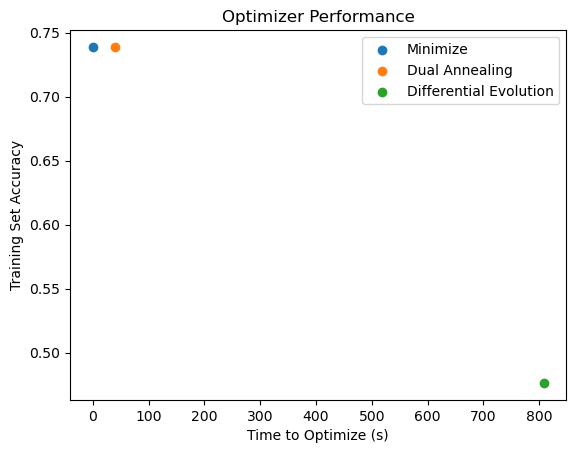

In [78]:
# Plot time vs. accuracy

plt.scatter(minimize_time, accuracy_minimize_train)
plt.scatter(dual_time, accuracy_dual_train)
plt.scatter(diff_time, accuracy_diff_train)

plt.title("Optimizer Performance")
plt.xlabel("Time to Optimize (s)")
plt.ylabel("Training Set Accuracy")
plt.legend(["Minimize", "Dual Annealing", "Differential Evolution"])
plt.show()

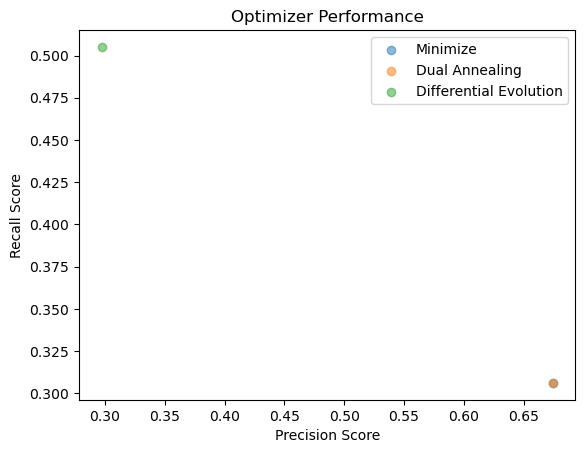

In [38]:
# Plot recall vs. precision
plt.scatter(precision_minimize_train, recall_minimize_train, alpha=0.5)
plt.scatter(precision_dual_train, recall_dual_train, alpha=0.5)
plt.scatter(precision_diff_train, recall_diff_train, alpha=0.5)

plt.title("Optimizer Performance")
plt.xlabel("Training Set Precision Score")
plt.ylabel("Training Set Recall Score")
plt.legend(["Minimize", "Dual Annealing", "Differential Evolution"])
plt.show()

## Look at most impactful coefficients 

In [49]:
# Print out all coefficients to compare at a glance 
coefficients_df = pd.DataFrame({'Minimize_values': optimal_theta_minimize[1:],
                                'Dual_values': optimal_theta_dual[1:],
                                'Diff_ev_values': optimal_theta_diff[1:],
                                'survey_questions': features.columns})
coefficients_df

,Minimize_values,Dual_values,Diff_ev_values,survey_questions
0,0.050741,0.050777,-1.611554,5. How long have you been using a social media...
1,0.070975,0.071013,1.743352,6. How frequently do you post (upload status o...
2,0.136064,0.136076,-1.842798,7. How much time do you spend daily in social ...
3,-0.204041,-0.204049,1.687551,9. How many friends do you have on social media?
4,-0.186973,-0.186976,-0.132728,10. How many friends do you know personally in...
5,-0.061247,-0.061279,1.600322,11. How many groups you are tagged in social m...
6,-0.150652,-0.150692,-0.922461,14.Do you believe social media is a good thing?
7,-0.529103,-0.529090,-1.138763,"15. When you see something in social media, do..."
8,0.091475,0.091528,-0.516334,16. Have you ever experienced peer pressure du...
9,0.248524,0.248543,-1.871911,17. Does your emotion get influenced by other'...


In [51]:
# Looking at the top 15 coefficients with highest absolute values 
minimize_top_15 = np.abs(np.array(optimal_theta_minimize)).argsort()[::-1][:15]
dual_top_15 = np.abs(np.array(optimal_theta_dual)).argsort()[::-1][:15]
diff_top_15 = np.abs(np.array(optimal_theta_diff)).argsort()[::-1][:15]

In [43]:
# Printing matching top 15 coefficients between optimizers
common_coefficients = set(minimize_top_15).intersection(set(dual_top_15)).intersection(set(diff_top_15))
print(common_coefficients)

{27, 10, 18}


In [67]:
# Look at the most impactful survey questions 
minimize_narrowed_coeffs = []
dual_narrowed_coeffs = []
diff_narrowed_coeffs = []
survey_qs = []
for i in common_coefficients:
    print(features.columns[i-1])
    survey_qs.append(features.columns[i-1])
    print(optimal_theta_minimize[i])
    minimize_narrowed_coeffs.append(round(optimal_theta_minimize[i],3))
    print(optimal_theta_dual[i])
    dual_narrowed_coeffs.append(round(optimal_theta_dual[i], 3))
    print(optimal_theta_diff[i])
    diff_narrowed_coeffs.append(round(optimal_theta_diff[i], 3))

8. When do you usually use social media?_Night to late night
0.3296522145732946
0.32948968854243466
1.8917440239645136
17. Does your emotion get influenced by other's posts (success, failure, loss)? 
0.24852357464001937
0.24854308662910166
-1.8719106050693928
2. Which social media account do you use usually?_WeChat
-0.509892299406763
-1.96554468988456
-1.4646224437983668


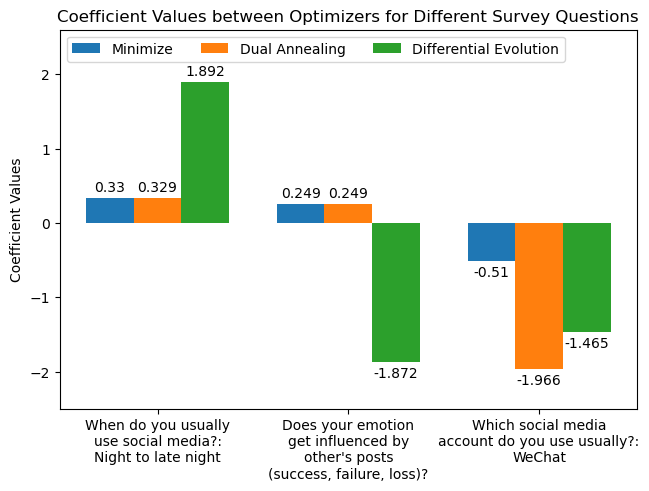

In [73]:
survey_qs = ("When do you usually\nuse social media?:\nNight to late night", 
             "Does your emotion\nget influenced by\nother's posts\n(success, failure, loss)?", 
             "Which social media\naccount do you use usually?:\nWeChat")
optimize_coeffs = {
    'Minimize': minimize_narrowed_coeffs,
    'Dual Annealing': dual_narrowed_coeffs,
    'Differential Evolution': diff_narrowed_coeffs
}

x = np.arange(len(survey_qs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in optimize_coeffs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add labels 
ax.set_ylabel('Coefficient Values')
ax.set_title('Coefficient Values between Optimizers for Different Survey Questions')
ax.set_xticks(x + width, survey_qs)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-2.5, 2.6)

plt.show()